## Robust Regression with Huber Loss and Gradient Descent

## Introduction
This script demonstrates how to apply Huber loss-based gradient descent to a real-world regression problem, comparing its performance with traditional Linear Regression. Huber loss is widely used in robust regression because it combines the best of L1 and L2 losses: it's quadratic for small errors and linear for large ones, making it less sensitive to outliers.


Importing libraries.
These are standard libraries used for numerical computation (numpy), data handling (pandas), and plotting (matplotlib).

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Huber Gradient Function

In [7]:
def huber_gradient_func(A, y, x, tau):
    gradient_sum = 0
    
    for i in range(len(A)):
        if abs(np.dot(A[i], x) - y[i]) <= tau:
            gradient = np.dot(A[i], x) - y[i]
        elif np.dot(A[i], x) - y[i] >= tau:
            gradient = tau
        else:
            gradient = -tau 
        gradient_sum += gradient * A[i]
    return gradient_sum


This function calculates the gradient of the Huber loss function for each row and accumulates the gradients. It’s essential for implementing custom gradient descent.

- `tau`: Threshold determining whether to use squared loss or linear loss.
- Uses piecewise logic to handle errors:
- Small residuals → squared loss (standard behavior)
- Large residuals → linear loss (reduces outlier impact)

### Gradient Descent using Huber Loss

In [8]:
def huber_gd(A, y, x, tau, L, tol, maxit):
    """
    Huber loss function
    :param A: numpy.ndarray of shape (m, n) containing the data
        m is the number of data points
        n is the number of features
    :param y: numpy.ndarray of shape (m,) containing the correct labels
    :param x: numpy.ndarray of shape (n,) containing the initial weights
    :param tau: the maximum step size
    :param L: the Lipschitz constant of the function
    :param tol: the maximum tolerance for the result
    :param maxit: the maximum number of iterations
    :return: the optimal weight and the list of all the partial weights
    """
    A = np.column_stack((np.ones(len(A)), A))
    for i in range(maxit):
        if i % 10000 == 0:
            print(f'Iteration: {i} Weights: {x}')
        grad_huber = huber_gradient_func(A, y, x, tau)
        if np.linalg.norm(grad_huber) < tol:
            return x, i
        else:
            x = x - (1 / L) * grad_huber
    
    return x, maxit

Performs gradient descent using the custom Huber gradient:

- Adds a bias term (column of ones).
- Iteratively updates weights using gradient steps.
- Stops if the gradient norm falls below a specified tolerance (`tol`) or after a maximum number of iterations.
- Returns the final weight vector and the number of iterations taken.

In [9]:
def linear_regression(X, y):
    # Add a column of ones to X for the intercept term
    X = np.column_stack((np.ones(len(X)), X))
    
    # Calculate the coefficients using the normal equation
    coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return coefficients

def norm_residuals(A, y, weights):
    A = np.column_stack((np.ones(len(A)), A))
    residuals = np.dot(A, weights)-y
    return np.linalg.norm(residuals)

def error_rate(A, y, weights):
    A = np.column_stack((np.ones(len(A)), A))
    residuals = np.dot(A, weights)-y
    errors = np.abs(residuals) <50000
    return f"{errors.sum()}/{len(errors)}"

- `linear_regression`: Solves for the optimal weights using the normal equation:
$$
w = (X^T X)^{-1} X^T y
$$
- `norm_residuals`Computes the L2 norm of residuals (model prediction errors).
- `error_rate`: Returns how many predictions are within a ±50,000 unit margin.

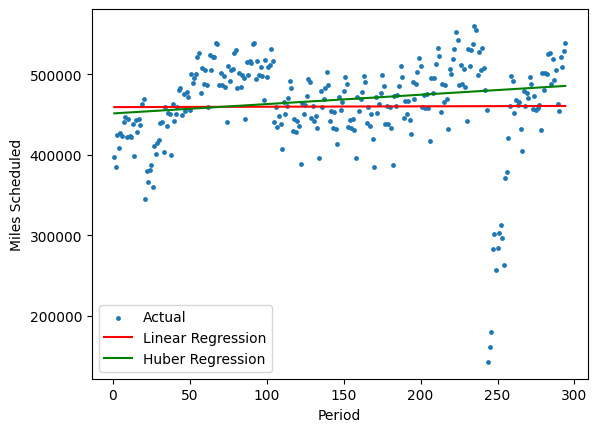

In [11]:
# Plotting the original data
plt.scatter(df_data['Period'], df_data['Scheduled'], label='Actual', s=6)

# Plotting the predicted values using weights_linear
plt.plot(df_data['Period'], np.dot(np.column_stack((np.ones(len(df_data)), df_data['Period'])), weights_linear), color='red', label='Linear Regression')

# Plotting the predicted values using weights_huber
plt.plot(df_data['Period'], np.dot(np.column_stack((np.ones(len(df_data)), df_data['Period'])), weights_huber), color='green', label='Huber Regression')

plt.xlabel('Period')
plt.ylabel('Miles Scheduled')
plt.legend()
plt.show()

### Visualization
- Plots the actual data as a scatter plot
- Overlays both regression lines:
    - Red for Linear Regression
    - Green for Huber Regression

In [10]:
df = pd.read_csv('data.csv')
df_data = df.copy()
df_data['Period'] = df_data.index.values + 1
even_rows = df_data[df_data.index % 2 == 0]
odd_rows = df_data[df_data.index % 2 != 0]
A= list(df_data['Period'])
A_train = list(odd_rows['Period'])
y_train = list(odd_rows['Scheduled'])
A_test = list(even_rows['Period'])
y_test = list(even_rows['Scheduled'])
weights_linear = linear_regression(A_train, y_train)
weights_huber = huber_gd(A_train, y_train, np.array([0, 0]), 25000, 4.28e6, 5000, 10**7)
iterations  = weights_huber[1]
weights_huber  = weights_huber[0]
residuals_linear = norm_residuals(A_test, y_test, weights_linear)
residuals_huber = norm_residuals(A_test, y_test, weights_huber)

print(f'Linear Regression residuals: {residuals_linear}')
print(f'Huber Regression residuals: {residuals_huber}')
print(f'Huber Regression iterations: {iterations}')


error_linear = error_rate(A_test, y_test, weights_linear)
error_huber = error_rate(A_test, y_test, weights_huber)

print(f'Linear Regression error rate: {error_linear}')
print(f'Huber Regression error rate: {error_huber}')


Iteration: 0 Weights: [0 0]
Iteration: 10000 Weights: [3468.08064628 2325.6452417 ]
Iteration: 20000 Weights: [6925.54111609 2309.25526965]
Iteration: 30000 Weights: [10381.79112087  2292.73546521]
Iteration: 40000 Weights: [13836.70143476  2276.22206408]
Iteration: 50000 Weights: [17290.27257705  2259.71506377]
Iteration: 60000 Weights: [20742.50506681  2243.21446181]
Iteration: 70000 Weights: [24193.39942294  2226.72025571]
Iteration: 80000 Weights: [27642.91686633  2210.36584661]
Iteration: 90000 Weights: [31090.90500446  2194.11273859]
Iteration: 100000 Weights: [34537.34520363  2177.88751663]
Iteration: 110000 Weights: [37982.16545606  2161.7599916 ]
Iteration: 120000 Weights: [41425.32006973  2145.60807538]
Iteration: 130000 Weights: [44866.70172339  2129.40299818]
Iteration: 140000 Weights: [48306.27961129  2113.20641471]
Iteration: 150000 Weights: [51744.05467884  2097.01832052]
Iteration: 160000 Weights: [55180.02787097  2080.83871115]
Iteration: 170000 Weights: [58614.2008079